In [1]:
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
TRAIN_DIR = 'horse-or-human'
VAL_DIR = 'validation-horse-or-human'

train_human_dir = os.path.join(TRAIN_DIR, 'humans')
train_horse_dir = os.path.join(TRAIN_DIR, 'horses')
val_human_dir = os.path.join(VAL_DIR, 'humans')
val_horse_dir = os.path.join(VAL_DIR, 'horses')


train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)
val_horse_names = os.listdir(val_horse_dir)
val_human_names = os.listdir(val_human_dir)

In [3]:
print('Total number of images in Horse training dataset : ', len(train_horse_names))
print('Total number of images in Human training dataset : ', len(train_human_names))
print('Total number of images in Horse validation dataset : ', len(val_horse_names))
print('Total number of images in Human validation dataset : ', len(val_human_names))

Total number of images in Horse training dataset :  500
Total number of images in Human training dataset :  527
Total number of images in Horse validation dataset :  128
Total number of images in Human validation dataset :  128


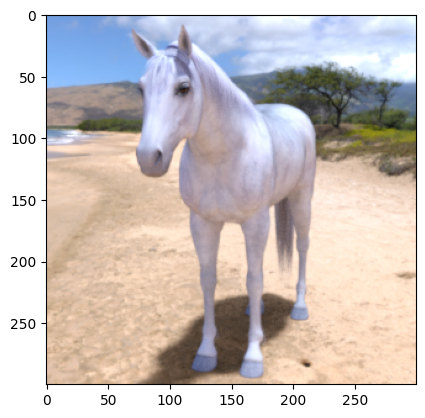

In [4]:
single_image = os.path.join(train_horse_dir, train_horse_names[0])
single_image = tf.keras.utils.load_img(single_image)
plt.imshow(single_image);

In [5]:
single_image = tf.keras.utils.img_to_array(single_image)
single_image.shape

(300, 300, 3)

In [6]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=(150,150),
    batch_size=32,
    label_mode='binary'
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    image_size=(150,150),
    batch_size=32,
    label_mode='binary'
)


Found 1027 files belonging to 2 classes.
Found 256 files belonging to 2 classes.


In [7]:
rescale_layer = tf.keras.layers.Rescaling(scale=1.0/255.0)
train_dataset_rescaled = train_dataset.map(lambda image, label : (rescale_layer(image), label))
validation_dataset_rescaled = validation_dataset.map(lambda img, label : (rescale_layer(img), label))

SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_dataset_rescaled
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE))

# No .shuffle() because validation data should remain in the same order.
validation_dataset_final = (validation_dataset_rescaled
                            .cache()
                            .prefetch(PREFETCH_BUFFER_SIZE))

In the input shape, we will place the reduced shape that we are expecting that is the desired size, since we will be compacting the image size using the tf.data datasets.

In [21]:
# Building a CNN model using multiple Convolution and Maxpooling layers to better understand features

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(150,150,3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │       9,470,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [23]:
history = model.fit(train_dataset_final, epochs = 15, validation_data=validation_dataset_final, verbose=2)

Epoch 1/15
33/33 - 4s - 116ms/step - accuracy: 0.6417 - loss: 0.8454 - val_accuracy: 0.8242 - val_loss: 0.4078
Epoch 2/15
33/33 - 3s - 88ms/step - accuracy: 0.9309 - loss: 0.1918 - val_accuracy: 0.8281 - val_loss: 0.9233
Epoch 3/15
33/33 - 3s - 87ms/step - accuracy: 0.9241 - loss: 0.3132 - val_accuracy: 0.8320 - val_loss: 0.8172
Epoch 4/15
33/33 - 3s - 86ms/step - accuracy: 0.9533 - loss: 0.1145 - val_accuracy: 0.8125 - val_loss: 1.3490
Epoch 5/15
33/33 - 3s - 87ms/step - accuracy: 0.9883 - loss: 0.0397 - val_accuracy: 0.8320 - val_loss: 1.7481
Epoch 6/15
33/33 - 3s - 88ms/step - accuracy: 0.9572 - loss: 0.1861 - val_accuracy: 0.8203 - val_loss: 1.4010
Epoch 7/15
33/33 - 3s - 87ms/step - accuracy: 0.9766 - loss: 0.0754 - val_accuracy: 0.8008 - val_loss: 0.9189
Epoch 8/15
33/33 - 3s - 87ms/step - accuracy: 0.9971 - loss: 0.0158 - val_accuracy: 0.8203 - val_loss: 2.0213
Epoch 9/15
33/33 - 3s - 87ms/step - accuracy: 0.9494 - loss: 0.2692 - val_accuracy: 0.7188 - val_loss: 2.0267
Epoch 10/

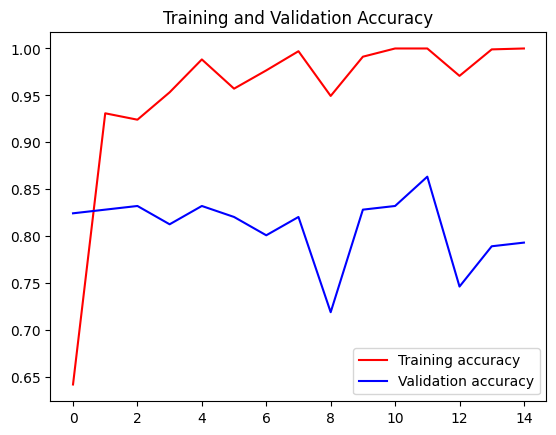

In [24]:
# Plotting the training accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.show()

With lesser number of parameters, we reached the similar accuracy graph due to reduced image size.